# **Probability Distributions in Python**

---



---



# Introduction
Probability and Statistics* are the foundational pillars of Data Science. In fact, the underlying principle of machine learning and 
artificial intelligence is nothing but statistical mathematics and linear algebra. Often you will encounter situations, especially 
in Data Science, where you have to read some research paper which involves a lot of maths in order to understand a particular topic 
and so if you want to get better at Data Science, it's imperative to have a strong mathematical understanding. This tutorial is about 
commonly used probability distributions in machine learning literature. If you are a beginner, then this is the right place for you to get started. 
In this tutorial, you'll:





*   Learn about probability jargons like random variables, density curve, probability functions, etc.
*   Learn about different probability distributions and their distribution functions along with some of their properties.
*   Learn to create and plot these distributions in python.

# **Random Variable**
A random variable is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, discrete and continuous.

A discrete random variable is one which may take on only a countable number of distinct values and thus can be quantified. For example, you can define a random variable $X$ to be the number which comes up when you roll a fair dice. $X$ can take values : [1,2,3,4,5,6] and therefore is a discrete random variable.

The probability distribution of a discrete random variable is a list of probabilities associated with each of its possible values. It is also sometimes called the probability function or the probability mass function. To have a mathematical sense, suppose a random variable X may take k different values, with the probability that $X=x_i$ defined to be $P(X=x_i)=p_i$. Then the probabilities pi must satisfy the following:

> 1: $0 < p_i < 1$ for each i

> 2: $p_1+p_2+...+p_k=1$

Some examples of discrete probability distributions are Bernoulli distribution, Binomial distribution, Poisson distribution etc.

A continuous random variable is one which takes an infinite number of possible values. For example, you can define a random variable X to be the height of students in a class. Since the continuous random variable is defined over an interval of values, it is represented by the area under a curve (or the integral).

The probability distribution of a continuous random variable, known as probability distribution functions, are the functions that take on continuous values. The probability of observing any single value is equal to 0 since the number of values which may be assumed by the random variable is infinite. For example, a random variable X may take all values over an interval of real numbers. Then the probability that $X$ is in the set of outcomes $A, P(A)$, is defined to be the area above A and under a curve. The curve, which represents a function $p(x)$, must satisfy the following:

> 1: The curve has no negative values $(p(x)>0$ for all $x$)

> 2: The total area under the curve is equal to 1.

A curve meeting these requirements is often known as a density curve. Some examples of continuous probability distributions are normal distribution, exponential distribution, beta distribution, etc.

There’s another type of distribution that often pops up in literature which you should know about called cumulative distribution function. All random variables (discrete and continuous) have a cumulative distribution function. It is a function giving the probability that the random variable $X$ is less than or equal to $x$, for every value $x$. For a discrete random variable, the cumulative distribution function is found by summing up the probabilities.

In the next section, you will explore some important distributions and try to work them out in python but before that import all the necessary libraries that you'll use.



In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [2]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# 1. Uniform Distribution
Perhaps one of the simplest and useful distribution is the uniform distribution. The probability density function of the continuous uniform distribution is:</br>

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Uniform_density_function.png" width="270" height="120" align="center" hspace="80"/>
<br>



Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. The following figure shows a uniform distribution in interval (a,b). Notice since the area needs to be 1. The height is set to $1/(b−a)$.

![uniform](https://www.computing.dcu.ie/~amccarren/mcm_images/Uniform_distribution.png) 





You can visualize uniform distribution in python with the help of a random number generator acting over an interval of numbers (a,b). You need to import the uniform function from scipy.stats module.

In [3]:
# import uniform distribution
from scipy.stats import uniform

The uniform function generates a uniform continuous variable between the specified interval via its loc and scale arguments. This distribution is constant between loc and loc + scale. The size arguments describe the number of random variates. If you want to maintain reproducibility, include a random_state argument assigned to a number.

In [4]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

You can use Seaborn’s distplot to plot the histogram of the distribution you just created. Seaborn’s distplot takes in multiple arguments to customize the plot. You first create a plot object ax. Here, you can specify the number of bins in the histogram, specify the color of the histogram and specify density plot option with kde and linewidth option with hist_kws. You can also set labels for x and y axis using the xlabel and ylabel arguments.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

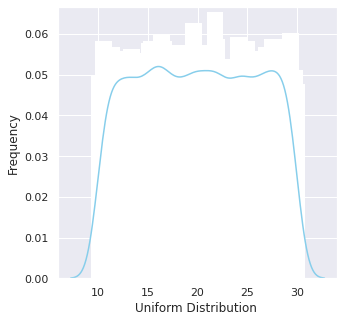

In [5]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

# **2. Normal Distribution**

Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science. You will encounter it at many places especially in topics of statistical inference. It is one of the assumptions of many data science algorithms too.

A normal distribution has a bell-shaped density curve described by its mean μ and standard deviation σ. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean μ and standard deviation σ at a given point x is given by:

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Normal_distribution.png" width="270" height="120" align="center" hspace="80"/>


Below is the figure describing what the distribution looks like:
Normal_distribution_2.png
<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Normal_distribution_2.png" width="470" height="220" align="center" hspace="80"/> 

Almost 68% of the data falls within a distance of one standard deviation from the mean on either side and 95% within two standard deviations. Also it worth mentioning that a distribution with mean 0 and standard deviation 1 is called a standard normal distribution.

You can generate a normally distributed random variable using scipy.stats module's norm.rvs() method. The loc argument corresponds to the mean of the distribution. scale corresponds to standard deviation and size to the number of random variates. If you want to maintain reproducibility, include a random_state argument assigned to a number.


In [6]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

You can visualize the distribution just like you did with the uniform distribution, using seaborn's distplot functions. The meaning of the arguments remains the same as in the last case.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

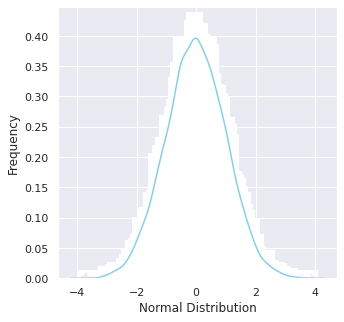

In [7]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

# **3. Exponential Distribution**
The exponential distribution describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It has a parameter λ called rate parameter, and its equation is described as :


<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/exponential_distribution.png" width="470" height="220" align="center" hspace="80"/> 

A decreasing exponential distribution looks like :

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/exponential_distribution_graph.png" width="470" height="220" align="center" hspace="80"/> 


You can generate an exponentially distributed random variable using scipy.stats module's expon.rvs() method which takes shape parameter scale as its argument which is nothing but 1/lambda in the equation. To shift distribution use the loc argument, size decides the number of random variates in the distribution. If you want to maintain reproducibility, include a random_state argument assigned to a number.

In [8]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

Again visualizing the distribution with seaborn yields the curve shown below:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

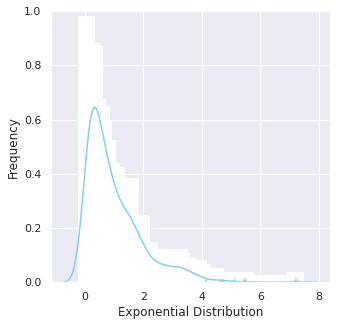

In [ ]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

# **4. Poisson Distribution**
Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate (μ) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated λ (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation:

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/poisson_distribution.png" width="470" height="220" align="center" hspace="80"/> " width="470" height="220" align="center" hspace="80"/> 




Note that the normal distribution is a limiting case of Poisson distribution with the parameter λ→∞. Also, if the times between random events follow an exponential distribution with rate λ, then the total number of events in a time period of length t follows the Poisson distribution with parameter λt.

The following figure shows a typical poisson distribution:

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/poission_distribution_graph.png" width="470" height="220" align="center" hspace="80"/> 

You can generate a poisson distributed discrete random variable using scipy.stats module's poisson.rvs() method which takes μ as a shape parameter and is nothing but the λ in the equation. To shift distribution use the loc parameter. size decides the number of random variates in the distribution. If you want to maintain reproducibility, include a random_state argument assigned to a number.

In [9]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

You can visualize the distribution just like you did with the uniform distribution, using seaborn's distplot functions. The meaning of the arguments remains the same.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

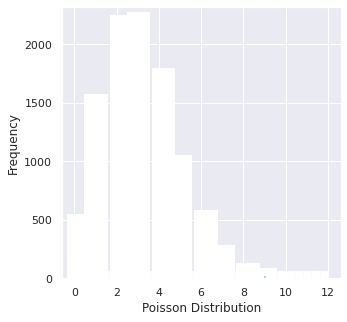

In [10]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

# **5. Binomial Distribution**
A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials is called a Binomial Distribution. However, The outcomes need not be equally likely, and each trial is independent of each other. The parameters of a binomial distribution are n and p where n is the total number of trials, and p is the probability of success in each trial. Its probability distribution function is given by :

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Binomial_distribution.png" width="270" height="90" align="center" hspace="80"/> 

where :

<img src="https://www.computing.dcu.ie/~amccarren/mcm_images/Binomial_distribution_part2.png" width="270" height="90" align="center" hspace="80"/> 

You can generate a binomial distributed discrete random variable using scipy.stats module's binom.rvs() method which takes n (number of trials) and p (probability of success) as shape parameters. To shift distribution use the loc parameter. size decides the number of times to repeat the trials. If you want to maintain reproducibility, include a random_state argument assigned to a number.

In [11]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

Visualizing the distribution you just created using seaborn's distplot renders the following histogram:

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

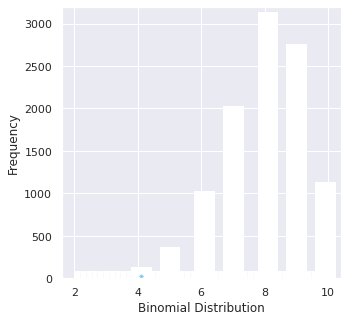

In [12]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

Note that since the probability of success was greater than 0.5 the distribution is skewed towards the right side. Also, poisson distribution is a limiting case of a binomial distribution under the following conditions:

The number of trials is indefinitely large or n→∞.

The probability of success for each trial is same and indefinitely small or p→0.
np=λ, is finite.
Normal distribution is another limiting form of binomial distribution under the following conditions:

1. The number of trials is indefinitely large, n→∞.

2. Both p and q are not indefinitely small.